In [100]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
%matplotlib inline

In [116]:
# Downloaded dataset from kaggale and palced in our local repositry
# Source Dataset link: kaggle.com/headsortails/covid19-tracking-germany?select=covid_de.csv
# Read the file from current directory and Load into Dataframe
dataframe = pd.read_csv("C:/Users/Sai Bethamsetty/Desktop/Data_ScienceLab/dev/experiment-skeleton/data/covid_de.csv")

total_cases = dataframe["cases"].sum()
total_deaths = dataframe["deaths"].sum()
total_recovered = dataframe["recovered"].sum()

print(total_cases, total_deaths, total_recovered)

#Summing based on date

before_distancing = dataframe.loc[dataframe['date'] <= '2020-03-20', ['cases','deaths','recovered']].sum()
after_distancing = dataframe.loc[dataframe['date'] > '2020-03-20', ['cases','deaths','recovered']].sum()


df_before = pd.DataFrame(before_distancing, columns = ['before-20'])
df_after = pd.DataFrame(after_distancing, columns = ['after-20'])
df = pd.concat([df_before, df_after], axis=1)



#Summing based on date groupby

# groupby_sum = dataframe.groupby(['date'])['cases','deaths','recovered'].sum()

# g = dataframe.groupby('date')
# output = g.apply(lambda x: x[x['date'] <= '2020-03-20']['cases', 'deaths', 'recovered'].sum())
# print(output)



#Before intervention

before_intervention = dataframe.loc[dataframe['date'] <= '2020-03-20', ['date', 'cases','deaths','recovered']]
before_intervention_groupby = before_intervention.groupby(['date'])['cases','deaths','recovered'].sum()

writer_before_intervention = pd.ExcelWriter('DSLPreprocessing_by_date_sum_before.xlsx', engine='xlsxwriter')
before_intervention_groupby.to_excel(writer_before_intervention, sheet_name='Sheet1')
# Output write in Excls file
writer_before_intervention.save()

#After intervention

after_intervention = dataframe.loc[dataframe['date'] > '2020-03-20', ['date', 'cases','deaths','recovered']]
after_intervention_groupby = after_intervention.groupby(['date'])['cases','deaths','recovered'].sum()

writer_after_intervention = pd.ExcelWriter('DSLPreprocessing_by_date_sum_after.xlsx', engine='xlsxwriter')
after_intervention_groupby.to_excel(writer_after_intervention, sheet_name='Sheet1')

# Output write in Excls file
writer_after_intervention.save()



178085 8245 160274


C:\Users\Sai Bethamsetty\anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
C:\Users\Sai Bethamsetty\anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [114]:
# The results are Before intervention SIR parameter's sumed values date wise,  by considering the dates before lockdown had imposed.
before_intervention_groupby

,cases,deaths,recovered
date,,,
2020-01-28,4,0,4
2020-01-29,2,0,2
2020-01-31,3,0,3
2020-02-03,1,0,1
2020-02-04,5,0,5
2020-02-06,1,0,1
2020-02-07,1,0,1
2020-02-11,3,0,3
2020-02-12,2,0,2


In [115]:
# The results are After intervention SIR Parameter's sumed values,  by considering the dates after lockdown had imposed
after_intervention_groupby

,cases,deaths,recovered
date,,,
2020-03-21,3338,92,3246
2020-03-22,2281,74,2207
2020-03-23,3718,123,3595
2020-03-24,4861,162,4698
2020-03-25,5703,211,5492
...,...,...,...
2020-05-18,528,5,27
2020-05-19,726,6,28
2020-05-20,785,11,30


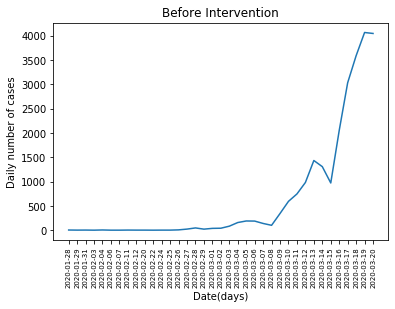

In [162]:
# Visuliaze the data from extracted file covid_de.csv
# Visuliaztion for daily number of cases Cases with respect to date(before intevention)
# Set directory
df = pd.read_excel('DSLPreprocessing_by_date_sum_before.xlsx')
# Set Plot
plt.plot(df['date'], df['cases'])
plt.xticks(df['date'], rotation=90, size = 7)
# Set Label
plt.xlabel('Date(days)')
plt.ylabel('Daily number of cases')
plt.title('Before Intervention')
plt.show()

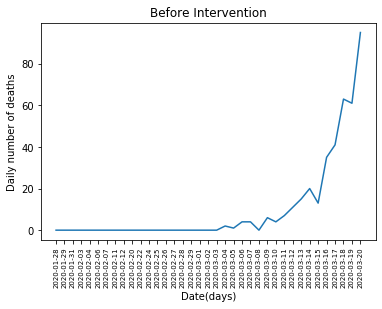

In [161]:
# Visuliaztion for daily number of  deaths with respect to date(before intevention)
# Set directory
df = pd.read_excel('DSLPreprocessing_by_date_sum_before.xlsx')
# Set Plot
plt.plot(df['date'], df['deaths'])
plt.xticks(df['date'], rotation=90, size = 7)
# Set Label
plt.xlabel('Date(days)')
plt.ylabel('Daily number of deaths')
plt.title('Before Intervention')
plt.show()

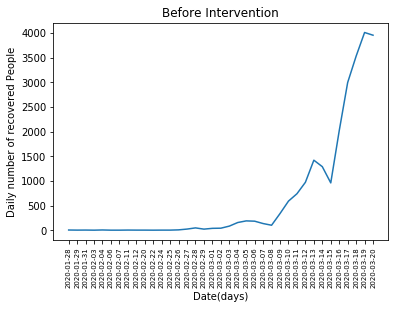

In [160]:
# Visuliaztion for daily number of recovered people with respect to date(before intevention)
# Set directory
df = pd.read_excel('DSLPreprocessing_by_date_sum_before.xlsx')
# Set Plot
plt.plot(df['date'], df['recovered'])
plt.xticks(df['date'], rotation=90, size = 7)
# Set label
plt.xlabel('Date(days)')
plt.ylabel('Daily number of recovered People')
plt.title('Before Intervention')
plt.show()

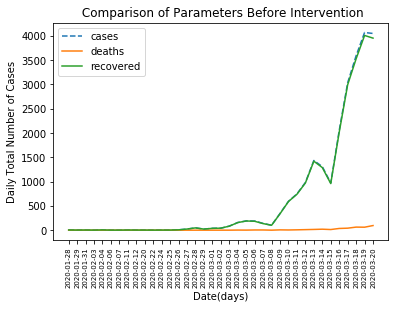

In [174]:
# Visuliaztion  for daily Total Number cases varying with respect to date(before intevention)
#  Read and load the before_data intervention file

df = pd.read_excel('DSLPreprocessing_by_date_sum_before.xlsx')

# Plot the covid19 SIR model Parameters vs date
plt.plot(df['date'], df['cases'], label = 'cases', ls = '--')
plt.plot(df['date'], df['deaths'],label = 'deaths')
plt.plot(df['date'], df['recovered'], label = 'recovered' )
plt.xticks(df['date'], rotation=90, size = 7)
# set label for x,y axis
plt.xlabel('Date(days)')
plt.ylabel('Daily Total Number of Cases')
plt.title(' Comparison of Parameters Before Intervention')
plt.legend()
plt.show()

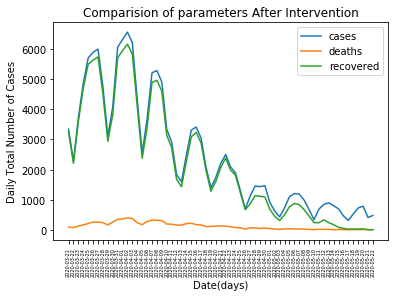

In [170]:
# Visuliaztion For daily Total Number of cases with respect to date(After intevention)

#  Read After intervention file

df = pd.read_excel('DSLPreprocessing_by_date_sum_after.xlsx')

# Plot the covid19 SIR model Parameters vs date

plt.plot(df['date'], df['cases'],label = 'cases')
plt.plot(df['date'], df['deaths'],label = 'deaths')
plt.plot(df['date'], df['recovered'],label = 'recovered')
plt.xticks(df['date'], rotation=90, size = 5)
# set label for x,y axis
plt.xlabel('Date(days)')
plt.ylabel('Daily Total Number of Cases')
plt.title('Comparision of parameters After Intervention')
plt.legend()
plt.show()

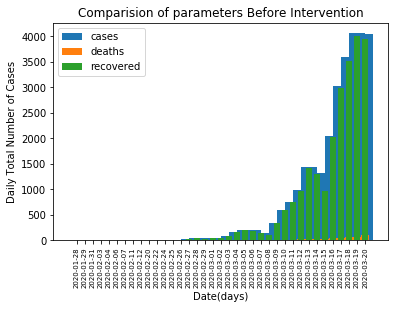

In [172]:
# Visuliaztion of barchart for all The SIR parameter's with respect to date(before intevention)
# Set directory read before data intervention file and Load into Dataframe

df = pd.read_excel('DSLPreprocessing_by_date_sum_before.xlsx')
# Plot the covid19 SIR model Parameters vs date
plt.bar(df['date'], df['cases'], label = 'cases', width = 2)
plt.bar(df['date'], df['deaths'],label = 'deaths', width = 1)
plt.bar(df['date'], df['recovered'], label = 'recovered')
plt.xticks(df['date'], rotation=90, size = 7)
# set label for x,y axis
plt.xlabel('Date(days)')
plt.ylabel('Daily Total Number of Cases')
plt.title('Comparision of parameters Before Intervention')
plt.legend()
plt.show()

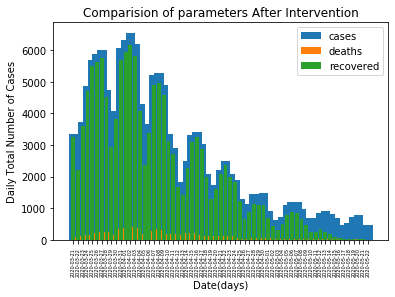

In [171]:
# Visuliaztion of barchart for all The SIR parameters with respect to date(After intevention)

#  Set directory read After data intervention file and Load into Dataframe

df = pd.read_excel('DSLPreprocessing_by_date_sum_after.xlsx')

# Plot the covid19 SIR model Parameters vs date

plt.bar(df['date'], df['cases'],label = 'cases', width = 2)
plt.bar(df['date'], df['deaths'],label = 'deaths', width = 1)
plt.bar(df['date'], df['recovered'],label = 'recovered')
plt.xticks(df['date'], rotation=90, size = 5)
# set label for x,y axis
plt.xlabel('Date(days)')
plt.ylabel('Daily Total Number of Cases')
plt.title('Comparision of parameters After Intervention')
plt.legend()
plt.show()